In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

960 787 3
(100, 81, 3)
(8100, 3)


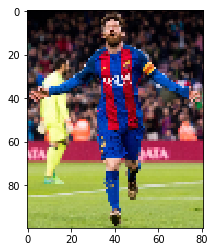

In [2]:

im = cv2.imread('./meesi.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

out_r = 100
r,c,ch = im.shape 
print r,c, ch
im = cv2.resize(im, (int(out_r*float(c)/r), out_r))
print im.shape

pixels = im.reshape((-1,3))
print pixels.shape

plt.imshow(im)
plt.show()



In [3]:
km = KMeans(n_clusters=16)

km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
centr_colors = np.array(km.cluster_centers_, dtype='uint8')
print centr_colors.dtype
print centr_colors

print centr_colors.shape

uint8
[[  8  75 186]
 [179 198  97]
 [ 53  34  38]
 [210   5  44]
 [231 202 194]
 [147 103  94]
 [  5  28  89]
 [ 13   9  15]
 [206 150 145]
 [244 247 163]
 [176  34  75]
 [142   4  22]
 [232 115 101]
 [163 186  75]
 [ 94  66  67]
 [  8  53 144]]
(16, 3)


In [5]:
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
print freq
print freq.sum()
freq = freq/pixels.shape[0]
print freq
print freq.sum()
print km.labels_

[ 277.  926.  904.  131.  288.  394.  342. 1396.  202.  270.  408.  152.
  156. 1250.  640.  364.]
8100.0
[0.03419753 0.11432099 0.11160494 0.01617284 0.03555556 0.04864198
 0.04222222 0.17234568 0.02493827 0.03333334 0.05037037 0.01876543
 0.01925926 0.15432099 0.07901235 0.04493827]
1.0
[ 7  7  7 ... 13 13 13]


In [6]:
k = 0
C =  km.predict(pixels)

for x in pixels:
    for k in range(km.n_clusters):
        pixels[C==k] = centr_colors[k]
print pixels        
        

[[ 13   9  15]
 [ 13   9  15]
 [ 13   9  15]
 ...
 [163 186  75]
 [163 186  75]
 [163 186  75]]


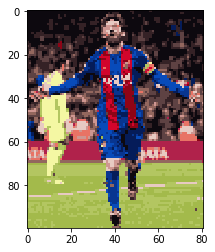

In [7]:
pixels = pixels.reshape((100, 81, 3))

#im2 = cv2.cvtColor(pixels, #cv2.COLOR_BGR2RGB)
plt.imshow(pixels)
plt.show()